[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamesMTucker/DATA_340_NLP/blob/master/Notebooks/Lecture_04_2023_02_07.ipynb)

# Lecture 04: Properties of Language, Statistics, Information Theory

1. Last week (Linguistic background and terminology, spacy, depedency trees or syntactic structure of languages)
2. This week:
    * Projects (Research ideas and GitHub README assignment)
    * Statistical properties of language
    * Explore some underlying assumptions about ideas and language
    * Discuss Information Theory and its use in NLP

# Projects

1. Proposals are marked 
2. All the topics look good and would make for a good project to publish on GitHub
3. All projects involve different NLP tasks (Named Entity Recognition, Information Extraction, Classification, etc.)

# Properties of Language

## Our shared humanity?

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3049087/

| Article | Pubmed Link |
| ---- | ---- |
| ![17_Languages](./images/figure_1.png) | ![17_Languages](./images/17_languages_qr.png) |

> We studied the frequencies of use in each of these languages for the 200 words that make up the Swadesh fundamental vocabulary word list. (p. 1102)

> Our results point to a surprising regularity in the way that human speakers use language. It might be that the way we use language and its structure means that some words inevitably will be used more than others.

* [Swadesh terms](https://en.wikipedia.org/wiki/Swadesh_list)
* [Lexicostatistics](https://en.wikipedia.org/wiki/Lexicostatistics) (comparative linguistics - lexical cognates between languages)


### Similarities of Swadesh term usage in different languages

<center><img src="./images/figure_3.png"  width="800" height="400"></center>

### Let's explore this in more detail

Let's compare the three volumes of _The Lord of the Rings_

In [1]:
# Imports
from pathlib import Path
import os

N.B.: If you are running this notebook in Jupyter Lab, then uncomment the below code accordingly

In [2]:
# Idf you are running this notebook locally in the GitHub clone, run this block of code to load
# the data below.

# We can use the Path package to create a generator of all patternized items
files = Path('./data/').glob('*.txt')

In [3]:
# If you are running this notebook in Google colab, uncomment this line of code and run
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)
# files = Path('gdrive/MyDrive/DATA_340_3_NLP/Datasets').glob('*.txt')

In [4]:
# Lets iterate over the generator and create a list of lists with a Short Volume name and its text
corpus = []

# Iterate over the files
for f in files:
    # Let's grab the short name from the file name
    base_name = os.path.basename(f)
    f_name, _ = os.path.splitext(base_name)
    
    # Since we don't need the number we can discard it
    _, name = f_name.split('LOTR_')
    with open(f, 'r', encoding="ISO-8859-1") as FIN:
        text = FIN.read()
        corpus.append([name, text])

In [5]:
# Let's look at our corpus
corpus[0][0]

'Fellowship'

In [6]:
# Let's create a LOTR corpus of just the text of each volume.
# We can use this corpus below to analyze various statistical features of the text.
LOTR = [t[1] for t in corpus]

### Zipf's Law

[George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf) argued that most words are not used that often. He formally defined his theorem as
$$P_n \sim \frac{1}{n^a}$$

It is a power law distribution. The frequency of any word is inverse in porportion to its rank in the vocabulary.

In [7]:
# Let's see this in action with LOTR

Let's write a function to compute the frequency of vocabulary items over a volume

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


def zipf_analysis(text, book):
    # Tokenize the text into words
    words = text.split()
    
    # Count the frequency of each word
    word_freq = Counter(words) # this one line of code does the same as the following for loop
    
    # vanilla python implementation
    # word_freq = {}
    # for word in words:
        # word_freq[word] = word_freq.get(word, 0) + 1
    
    
    # Sort the words by frequency - highest occuring terms are at the top
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # Plot the word frequency and rank to check for Zipf's law
    word_rank = np.arange(1, len(sorted_word_freq)+1) # X variable
    word_frequency = [i[1] for i in sorted_word_freq] # Y variable
    
    # Plot log to visualize the power law distribution
    plt.loglog(word_rank, word_frequency, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f"Zipf's Law for {book}")
    plt.show()
    return sorted_word_freq

#### Fellowship of the Ring

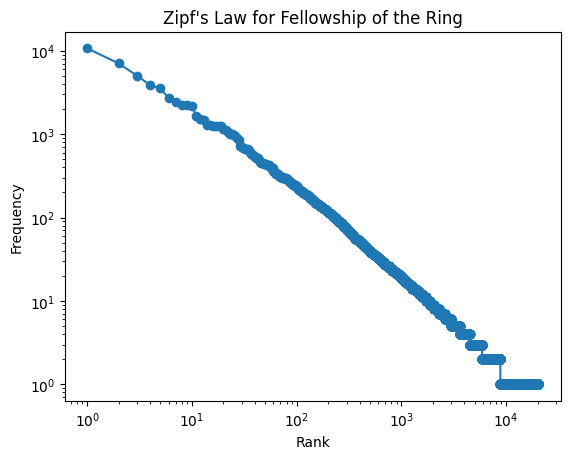

In [9]:
fellowship = zipf_analysis(LOTR[0], 'Fellowship of the Ring')

In [10]:
# Here let's use the output to explore the words that occur only once
# We can use pandas to explore our data
import pandas as pd

# Convert the tuples to a dataframe
df = pd.DataFrame(fellowship, columns=['word', 'frequency'])

# Let's query the dataframe for words that occure only once
fellowship_hapax_legomenon = df.query('frequency == 1')
fellowship_hapax_legomenon.shape

(11394, 2)

#### Two Towers

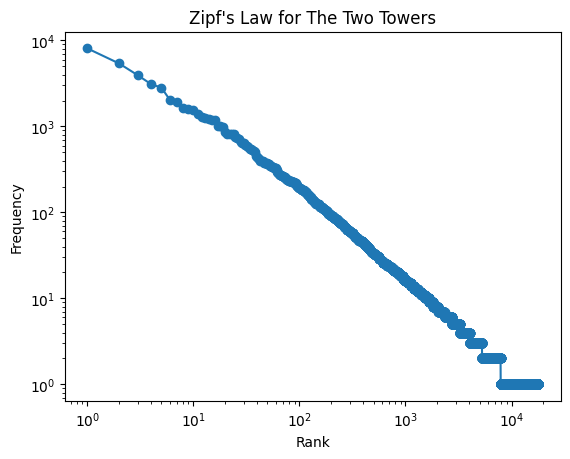

In [11]:
# Let's check the distribution of the two towers
two_towers = zipf_analysis(LOTR[1], 'The Two Towers')

In [12]:
# Let's use Pandas again to look at some word frequencies
df = pd.DataFrame(two_towers, columns=['word', 'frequency'])

two_towers_hapax_legomenon = df.query('frequency == 1')
two_towers_hapax_legomenon.shape

(9909, 2)

#### Return of the King

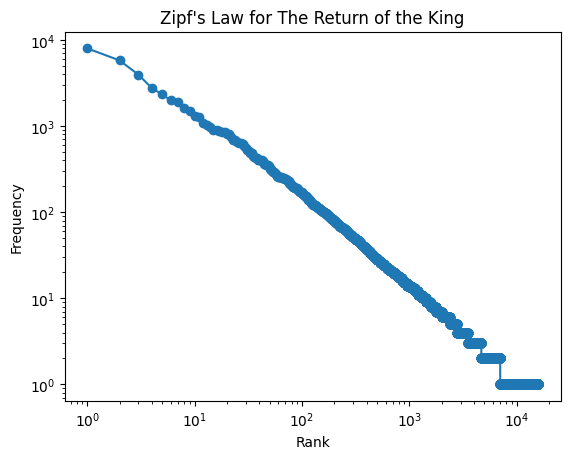

In [13]:
# Plot the distribution of terms
return_king = zipf_analysis(LOTR[2], 'The Return of the King')

In [14]:
# Let's explore again some of the lower frequency terms
df = pd.DataFrame(return_king, columns=['word', 'frequency'])

return_king_hapax_legomenon = df.query('frequency == 1')
return_king_hapax_legomenon.shape

(8789, 2)

### Most used word in the USA:

The above demonstration of _The Lord of the Rings_ is generalizable to any English text, and as discussed above to many languages for certain kinds of words.

<img src="./images/most_used_01.png"  width="800" height="400">

But ... <br>
<img src="./images/most_used_02.png" width="800" height="400">

N.B.: Notice the study of Manning and Schutze, _Foundations of Statistical Natural Language Processing_, who demonstrate that a randomly created text follows the power law observation as discussed by Mandelbrot. They conclude their discussion observing that:

> what makes frequency-based approaches to language hard is that almost all words are rare. Zipf's law is a good way to encapsulate this insight. (p. 29)

# Tokenization, Lemmatization, and Stopwords

In our previous class, we explored the SpaCy package and specifically the dependency tree parsers. We ended the class with the following code:

```Python
import pandas as pd
cols = ['token', 'lemma', 'POS', 'tag', 'dependecy', 'shape', 'is_alpha', 'is_stop']

ling_properties = []

for token in list(doc.sents)[100]:
  ling_properties.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])
df = pd.DataFrame(ling_properties, columns=cols)
```

We see from above that our unstructured text is pretty messy. So, we want to normalize it -- that is, cleaning up the text so captilization, spelling, punctuation does not impede our analysis of the vocabulary.

## Tokenizing _The Fellowship of the Ring_ with NLTK

* [NLTK](https://www.nltk.org/index.html)
* [NLTK Tokenizer](https://www.nltk.org/api/nltk.tokenize.html)

In [15]:
from nltk.tokenize import word_tokenize

### Tokenization

In [16]:
def tokenize_text(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return ' '.join([w for w in words])

In [17]:
fellowship_tokenized = tokenize_text(LOTR[0])

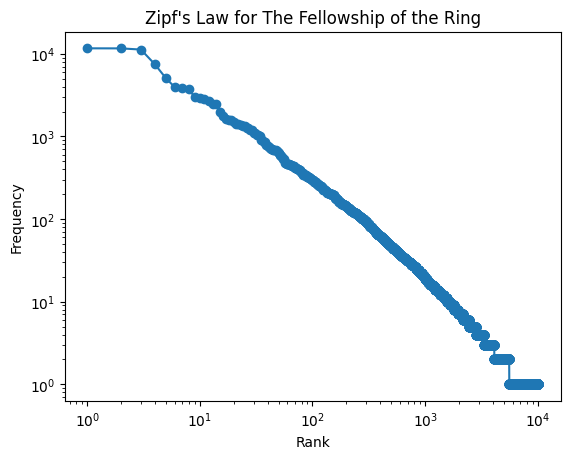

In [18]:
fellowship_tokenized = zipf_analysis(fellowship_tokenized, 'The Fellowship of the Ring')

In [19]:
# What's our most used token
fellowship_tokenized

[(',', 11661),
 ('the', 11640),
 ('.', 11266),
 ('and', 7438),
 ('of', 5071),
 ('to', 3939),
 ("'", 3837),
 ('a', 3718),
 ('he', 2987),
 ('in', 2943),
 ('i', 2822),
 ('it', 2674),
 ('that', 2486),
 ('was', 2466),
 ('they', 1972),
 ('you', 1745),
 ('but', 1616),
 ('his', 1571),
 ('not', 1566),
 ('said', 1479),
 ('!', 1428),
 ('for', 1427),
 ('as', 1385),
 ('is', 1344),
 (';', 1324),
 ('on', 1276),
 ('had', 1265),
 ('`', 1202),
 ('at', 1184),
 ('with', 1116),
 ('frodo', 1096),
 ('were', 1051),
 ('have', 1034),
 ('there', 1024),
 ('we', 905),
 ('be', 894),
 ('all', 856),
 ('him', 847),
 ('them', 797),
 ('from', 758),
 ('?', 737),
 ('if', 735),
 ('their', 702),
 ('or', 696),
 (':', 688),
 ('do', 685),
 ("'s", 680),
 ('are', 669),
 ('now', 655),
 ('out', 630),
 ('up', 604),
 ('no', 598),
 ('by', 578),
 ('will', 560),
 ('this', 535),
 ('then', 528),
 ('my', 481),
 ("n't", 471),
 ('could', 467),
 ('what', 467),
 ('gandalf', 463),
 ('into', 460),
 ('me', 456),
 ('been', 455),
 ('would', 451),


## Lemmatization (or Stemming)

Sometimes the idea of tokenization can overlap with the linguistic idea of lemmatization. The linguistic idea of lemmatization is the morphological analysis of a lemma to reduces its inflected forms to produce a lemma or stem. 

| Inflected | Lemma |
| ----- | ----- |
| were | be |
| organizations | organization |
| swam | swim |
| am | be |

There are several algorithms to stemm or lemmatize a text.
* [Porter Stemmer](https://www.nltk.org/howto/stem.html)
* [SpaCy](https://spacy.io/api/lemmatizer)
* Lovins Stemmer (1968)
* Paice Stemmer (1990)

In [20]:
## Let's lemmatize the text
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [21]:
part_of_fellowship = LOTR[0][:1000]
part_of_fellowship_tokens = word_tokenize(part_of_fellowship)
lemmas = []
for token in part_of_fellowship_tokens:
    lemmas.append(stemmer.stem(token))
" ".join([l for l in lemmas])

'three ring for the elven-k under the sky , seven for the dwarf-lord in their hall of stone , nine for mortal men doom to die , one for the dark lord on hi dark throne in the land of mordor where the shadow lie . one ring to rule them all , one ring to find them , one ring to bring them all and in the dark bind them in the land of mordor where the shadow lie . foreword thi tale grew in the tell , until it becam a histori of the great war of the ring and includ mani glimps of the yet more ancient histori that preced it . it wa begun soon after _the hobbit_ wa written and befor it public in 1937 ; but i did not go on with thi sequel , for i wish first to complet and set in order the mytholog and legend of the elder day , which had then been take shape for some year . i desir to do thi for my own satisfact , and i had littl hope that other peopl'

In [22]:
LOTR[0][:1000]

'Three Rings for the Elven-kings under the sky,\n               Seven for the Dwarf-lords in their halls of stone,\n            Nine for Mortal Men doomed to die,\n              One for the Dark Lord on his dark throne\n           In the Land of Mordor where the Shadows lie.\n               One Ring to rule them all, One Ring to find them,\n               One Ring to bring them all and in the darkness bind them\n           In the Land of Mordor where the Shadows lie.\n           \nFOREWORD\n\nThis tale grew in the telling, until it became a history of the Great War of the Ring and included many glimpses of the yet more ancient history that preceded it. It was begun soon after _The Hobbit_ was written and before its publication in 1937; but I did not go on with this sequel, for I wished first to complete and set in order the mythology and legends of the Elder Days, which had then been taking shape for some years. I desired to do this for my own satisfaction, and I had little hope that o

## Stopwords

Often times you will find in NLP literature the removal of stop words. Stop words are usually particles, conjunctions, adverbs, or other words that are stripped from the content of a document.

In [23]:
import nltk
import string

punctuation = list(string.punctuation)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [25]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# tokenize and remove stop words at one time
def tokenize_stopword_text(text):
    tokens = word_tokenize(text)
    return ' '.join([t.lower() for t in tokens if t not in stop_words and t not in punctuation])

In [27]:
fellowship_stop_words_removed = tokenize_stopword_text(LOTR[0])

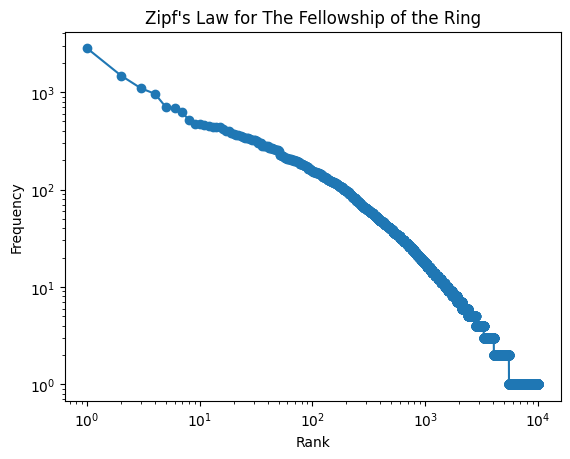

In [28]:
fellowship_stop_words_removed = zipf_analysis(fellowship_stop_words_removed, 'The Fellowship of the Ring')

In [29]:
fellowship_stop_words_removed

[('i', 2817),
 ('said', 1479),
 ('frodo', 1096),
 ('the', 961),
 ('he', 702),
 ("'s", 680),
 ('but', 621),
 ('it', 516),
 ("n't", 471),
 ('could', 467),
 ('gandalf', 463),
 ('would', 451),
 ('long', 443),
 ('they', 438),
 ('came', 435),
 ('one', 419),
 ('like', 401),
 ('sam', 400),
 ('go', 381),
 ('many', 371),
 ('and', 361),
 ('come', 361),
 ('great', 358),
 ('there', 347),
 ('back', 342),
 ('still', 342),
 ('away', 337),
 ('us', 329),
 ('far', 325),
 ('ring', 324),
 ('bilbo', 323),
 ('dark', 313),
 ('old', 302),
 ('see', 299),
 ('seemed', 297),
 ('last', 283),
 ('know', 283),
 ('hobbits', 282),
 ('even', 279),
 ('time', 277),
 ('went', 267),
 ('may', 267),
 ('way', 267),
 ('upon', 264),
 ('light', 260),
 ('road', 259),
 ('must', 253),
 ('yet', 252),
 ('shall', 252),
 ('looked', 250),
 ('merry', 227),
 ('heard', 225),
 ('night', 224),
 ('little', 222),
 ('much', 220),
 ('end', 217),
 ('then', 211),
 ('thought', 210),
 ('pippin', 209),
 ('aragorn', 206),
 ('well', 204),
 ('say', 204),


In [30]:
fellowship_stop_words_removed[-40:]

[('border-land', 1),
 ("'grievous", 1),
 ('betrayal', 1),
 ('appoint', 1),
 ('_afraid_', 1),
 ('schooling', 1),
 ('speak-we', 1),
 ('have-since', 1),
 ('bothering', 1),
 ('screws', 1),
 ("'stop", 1),
 ('aloof', 1),
 ('unwelcome', 1),
 ('arrange-here', 1),
 ('hobbit-voices', 1),
 ('panic', 1),
 ('rowans', 1),
 ('overtook', 1),
 ('badly', 1),
 ('screwed', 1),
 ('brushing', 1),
 ("'steady", 1),
 ('stock-still', 1),
 ('flounder', 1),
 ('water-rat', 1),
 ('nuisances', 1),
 ('emptied', 1),
 ('shouldering', 1),
 ('_here', 1),
 ('ring._', 1),
 ('called_the', 1),
 ('towers_', 1),
 ('dominated', 1),
 ('by_orthanc_', 1),
 ('of_minas', 1),
 ('morgul_', 1),
 ('darkness._', 1),
 ('mission', 1),
 ('in_the', 1),
 ('=====================================================', 1)]